In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Assuming you have uploaded the files
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Check the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [17]:
# Check for missing values and basic info
print(customers.info())
print(products.info())
print(transactions.info())

# Descriptive statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

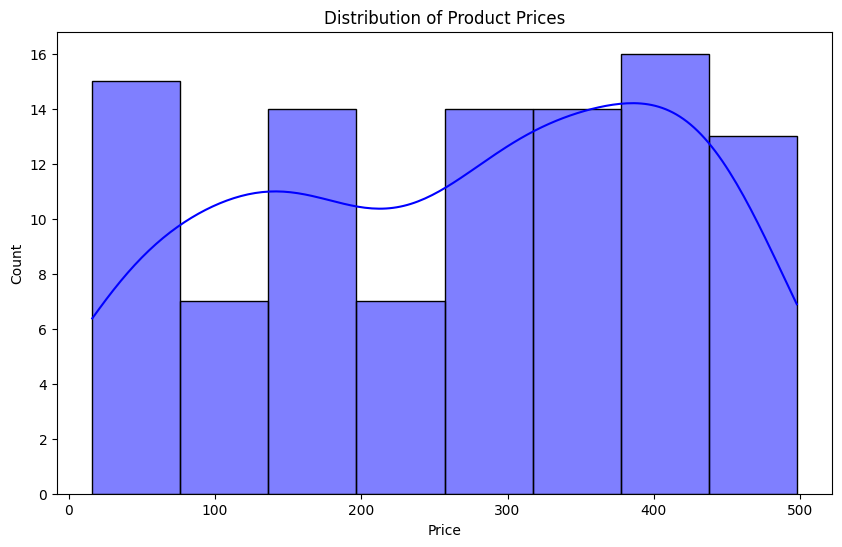

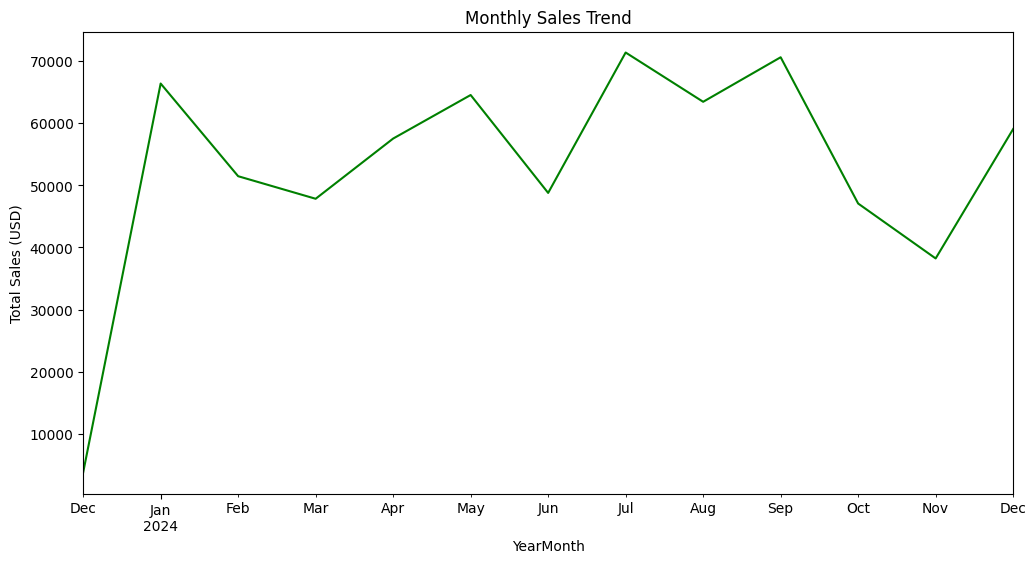

<ipython-input-18-99a248959791>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='TotalValue', palette='viridis')


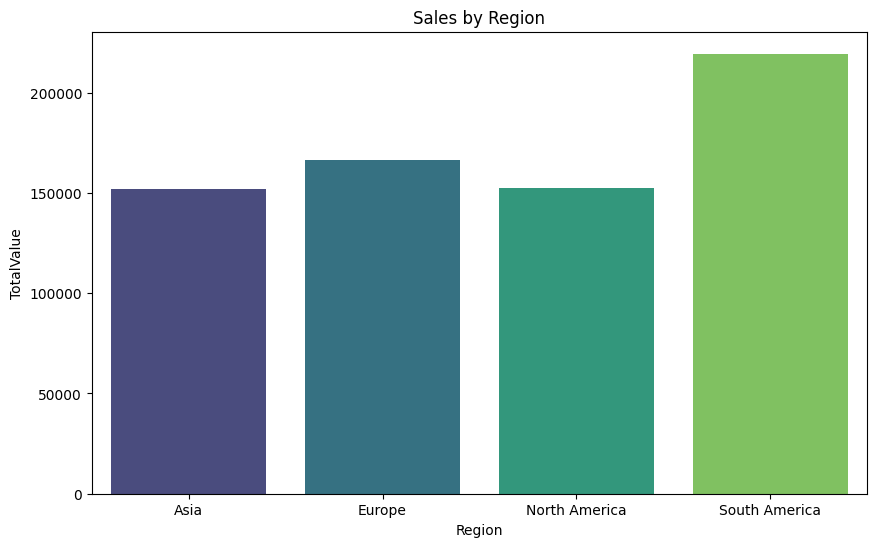

In [18]:
# Distribution of prices in Products.csv
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.show()

# Total value of transactions over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales (USD)')
plt.show()

# Sales by region (from Customers.csv)
region_sales = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID') \
                             .groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='Region', y='TotalValue', palette='viridis')
plt.title('Sales by Region')
plt.show()


In [ ]:
#data is clean no missing values found

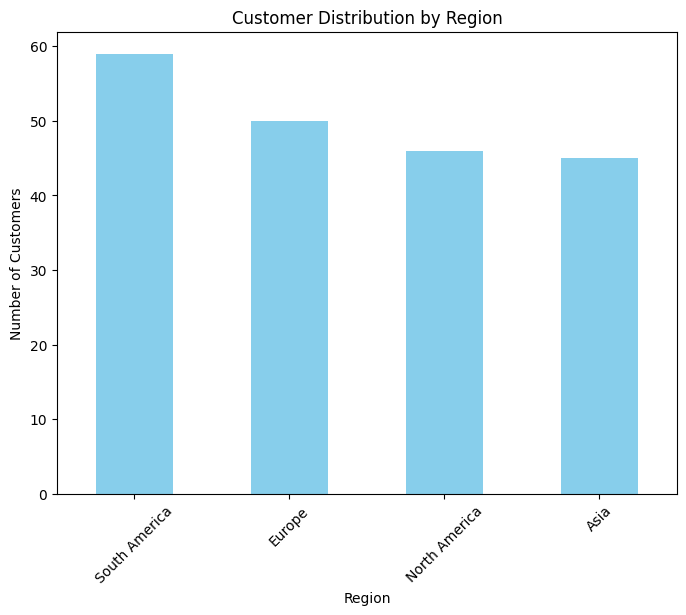

In [5]:
import matplotlib.pyplot as plt
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8,6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Customer Region Distribution

#     Plot Type: Bar chart
#     Purpose: Show the distribution of customers across different regions (e.g., South America, Asia, etc.).
#     Insight: This plot helps identify which region has the highest customer base.


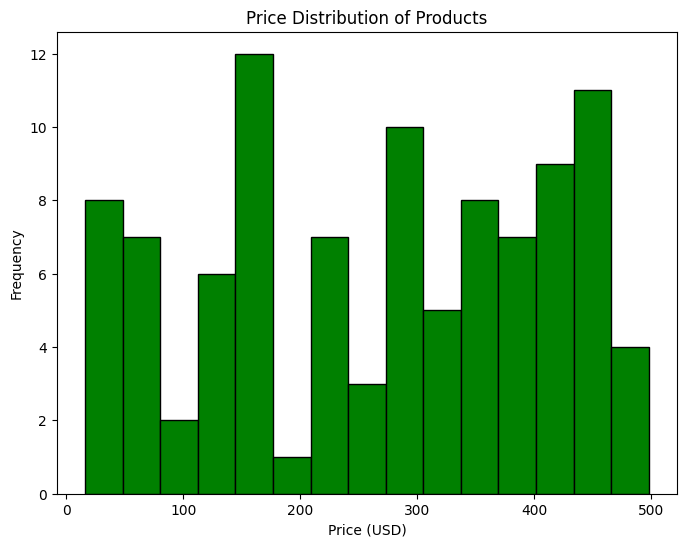

16.08
497.76


In [20]:
plt.figure(figsize=(8,6))
products['Price'].plot(kind='hist', bins=15, color='green', edgecolor='black')
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()
plt.show()
print(min(products['Price']))
print(max(products['Price']))

# 2. Price Distribution of Products

#     Plot Type: Histogram
#     Purpose: Show the distribution of product prices to understand the pricing strategy.
#     Insight: Helps understand if products are generally priced higher or lower, and whether there are outliers.

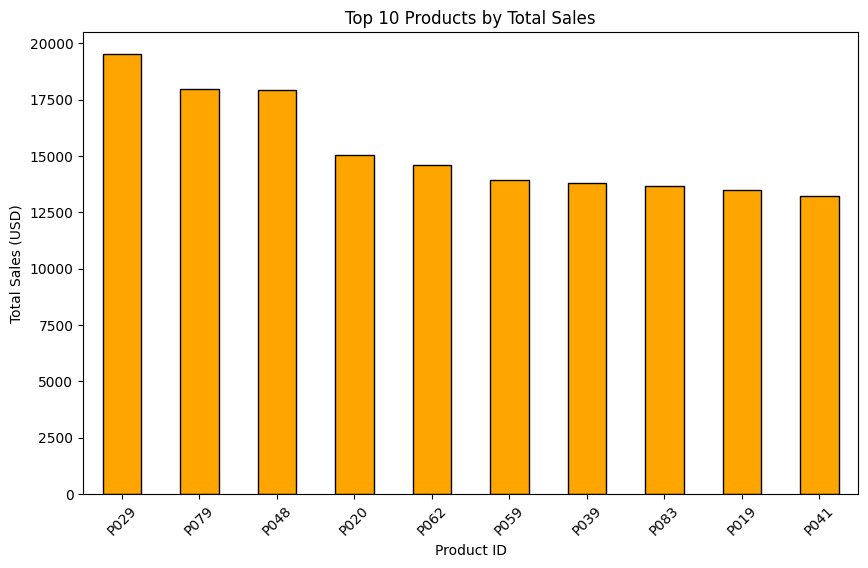

In [13]:
total_sales_per_product = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
total_sales_per_product.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


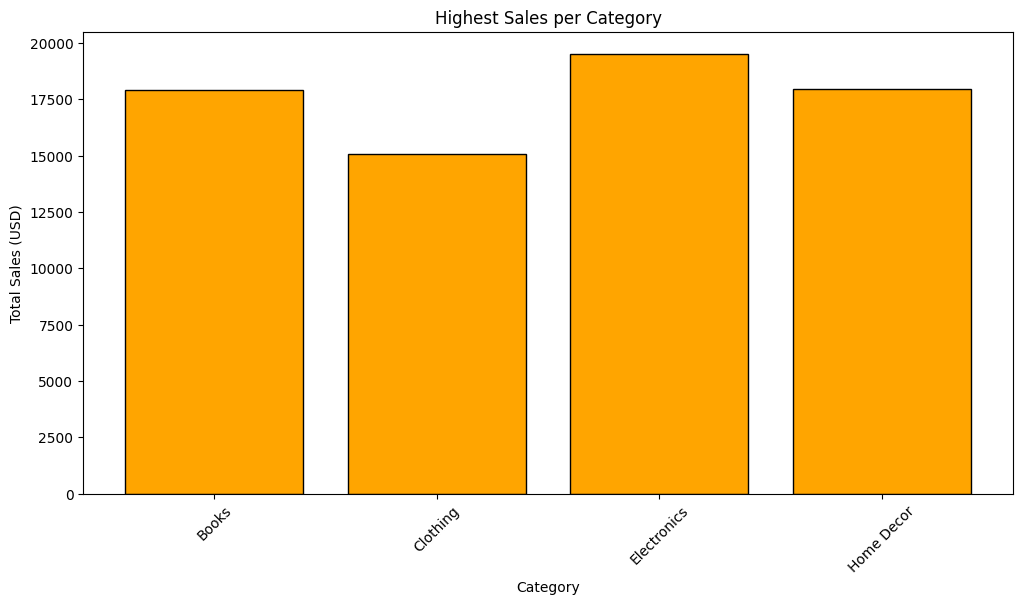

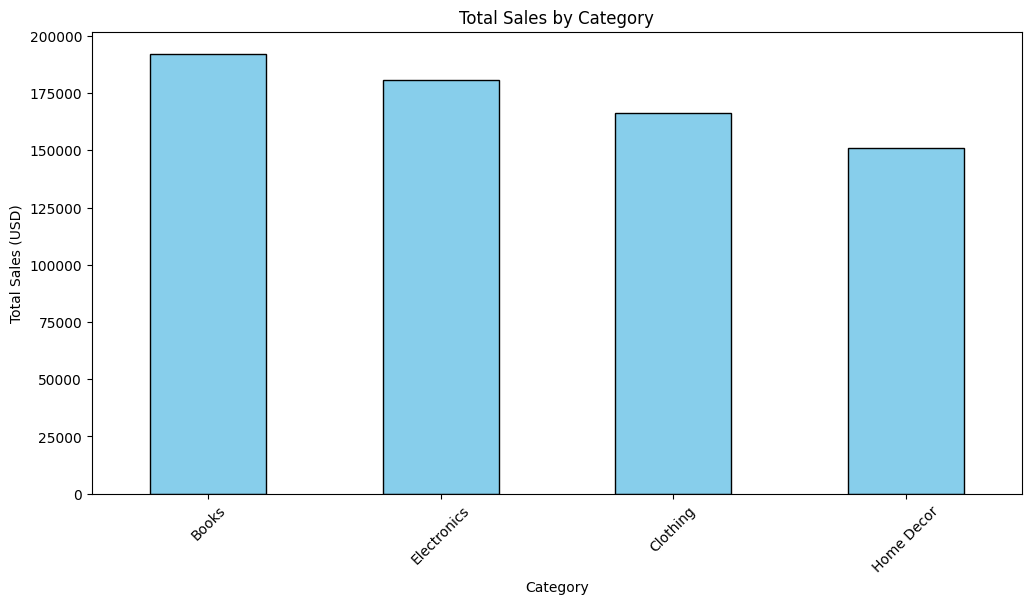

Highest Sales per Category:
       Category ProductID  TotalValue
10        Books      P048    17905.20
30     Clothing      P020    15060.92
59  Electronics      P029    19513.80
93   Home Decor      P079    17946.91

Total Sales by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your datasets
# Assuming you have already loaded the 'transactions' and 'products' dataframes

# Merge transactions with product data to get the product category and name
transaction_data = transactions.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Task 1: Highest Sales per Category
category_sales = transaction_data.groupby(['Category', 'ProductID'])['TotalValue'].sum().reset_index()
highest_sales_per_category = category_sales.loc[category_sales.groupby('Category')['TotalValue'].idxmax()]

# Plot Highest Sales per Category
plt.figure(figsize=(12, 6))
plt.bar(highest_sales_per_category['Category'], highest_sales_per_category['TotalValue'], color='orange', edgecolor='black')
plt.title('Highest Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

# Task 2: Total Sales by Category
total_sales_by_category = transaction_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plot Total Sales by Category
plt.figure(figsize=(12, 6))
total_sales_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

# Display both results for quick reference
print("Highest Sales per Category:")
print(highest_sales_per_category[['Category', 'ProductID', 'TotalValue']])

print("\nTotal Sales by Category:")
print(total_sales_by_category)


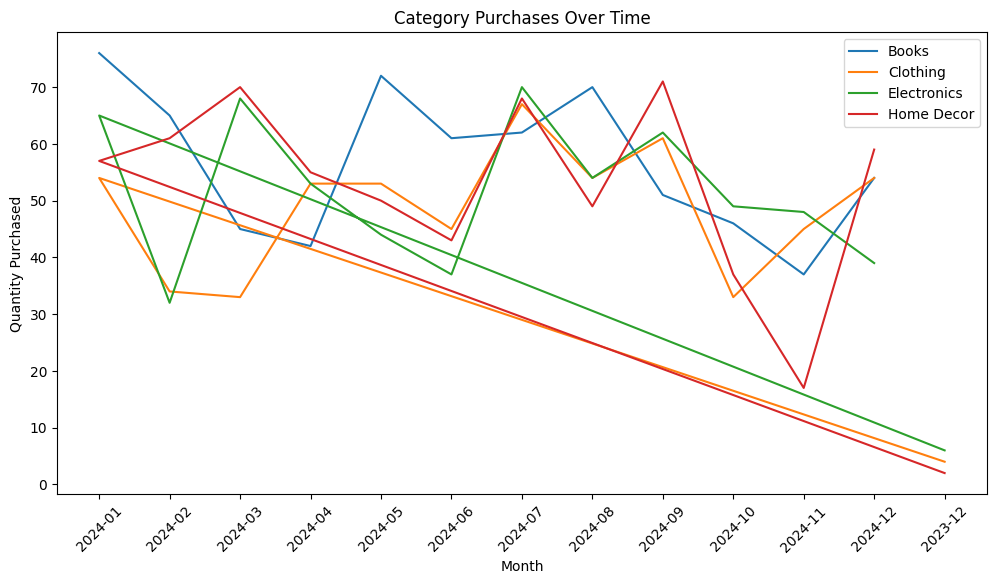

In [24]:
# 1. Category vs Time (Purchases per Month per Category)
data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.to_period('M')
category_time = data.groupby(['Category', 'Month'])['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
for category in category_time['Category'].unique():
    subset = category_time[category_time['Category'] == category]
    plt.plot(subset['Month'].astype(str), subset['Quantity'], label=category)
plt.title('Category Purchases Over Time')
plt.xlabel('Month')
plt.ylabel('Quantity Purchased')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [25]:
# 2. High and Low Sale Months per Category
category_sales = data.groupby(['Category', 'Month'])['TotalValue'].sum().reset_index()
high_low_months = category_sales.groupby('Category')['TotalValue'].agg(['idxmax', 'idxmin'])
high_low_months['HighMonth'] = high_low_months['idxmax'].apply(lambda x: category_sales.loc[x, 'Month'])
high_low_months['LowMonth'] = high_low_months['idxmin'].apply(lambda x: category_sales.loc[x, 'Month'])
high_low_months = high_low_months[['HighMonth', 'LowMonth']]
print("High and Low Sale Months per Category:")
print(high_low_months)

High and Low Sale Months per Category:
            HighMonth LowMonth
Category                      
Books         2024-05  2024-03
Clothing      2024-09  2023-12
Electronics   2024-07  2023-12
Home Decor    2024-12  2023-12


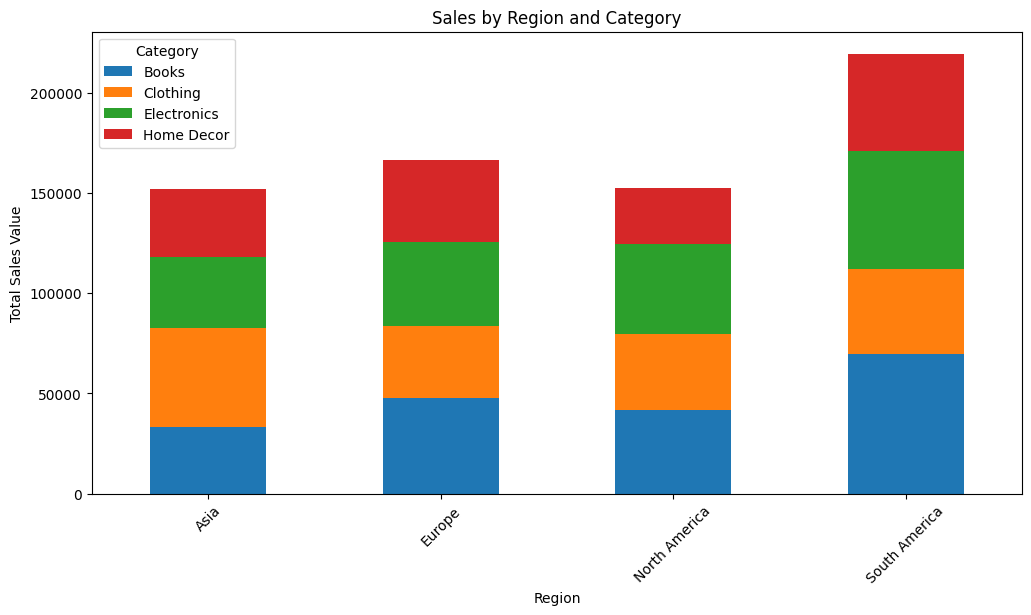

In [26]:
region_category = data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
region_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


In [27]:
category_region_sales = data.groupby(['Category', 'Region'])['TotalValue'].sum().reset_index()
high_low_regions = category_region_sales.groupby('Category')['TotalValue'].agg(['idxmax', 'idxmin'])
high_low_regions['HighRegion'] = high_low_regions['idxmax'].apply(lambda x: category_region_sales.loc[x, 'Region'])
high_low_regions['LowRegion'] = high_low_regions['idxmin'].apply(lambda x: category_region_sales.loc[x, 'Region'])
high_low_regions = high_low_regions[['HighRegion', 'LowRegion']]
print("High and Low Sale Regions per Category:")
print(high_low_regions)


High and Low Sale Regions per Category:
                HighRegion      LowRegion
Category                                 
Books        South America           Asia
Clothing              Asia         Europe
Electronics  South America           Asia
Home Decor   South America  North America
